In [73]:
!pip install seaborn

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [56]:
type(digits.data)

numpy.ndarray

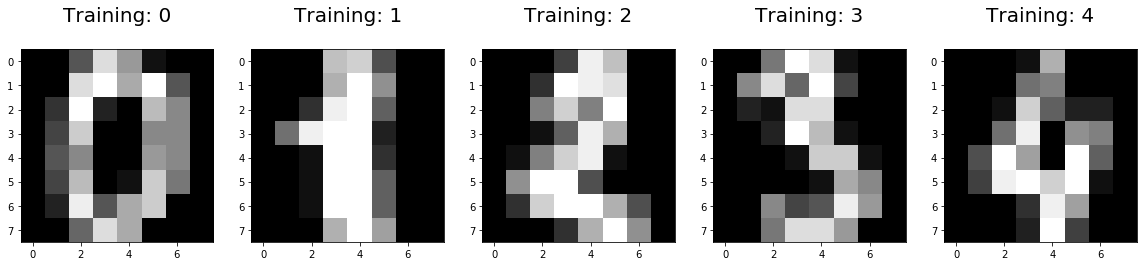

In [8]:
# visualize data

import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [58]:
# split into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)


print('Train Data Shape' , x_train.shape)
print("Test Data Shape", x_test.shape)

Train Data Shape (1437, 64)
Test Data Shape (360, 64)


In [59]:
# train the model

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# predict the first image
result = logisticRegr.predict( [ x_test[0] ] )
print(result)

[2]


In [66]:
# predict first 10
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [69]:
# score of our algorithm
score = logisticRegr.score(x_test, y_test)
print(score)

0.9388888888888889


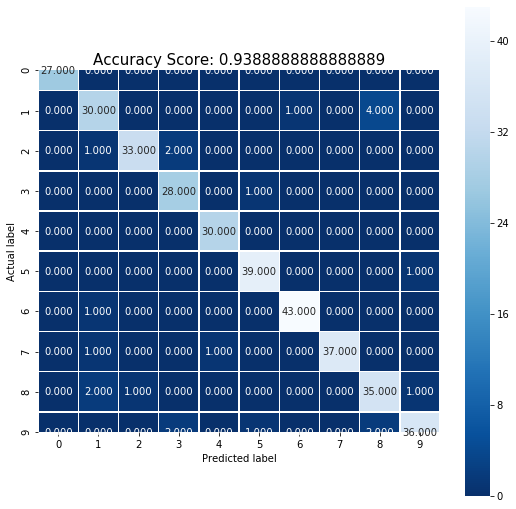

In [72]:
# confustion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

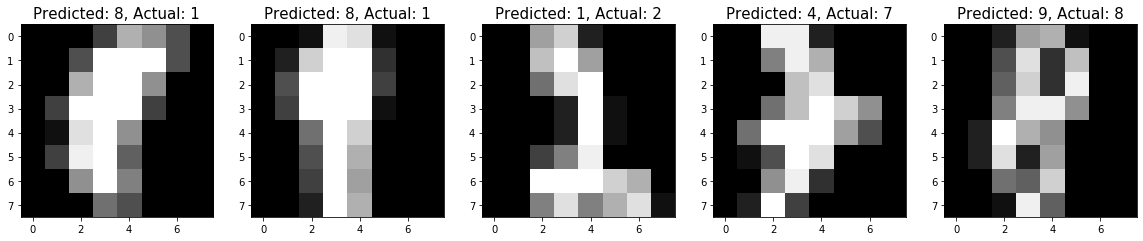

In [41]:
# showing misclassified images
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
test_predictions = logisticRegr.predict(x_test)
for label, predict in zip(y_test, test_predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
    
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(test_predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.974     1.000     0.987        37
           1      0.841     0.860     0.851        43
           2      0.952     0.909     0.930        44
           3      0.896     0.956     0.925        45
           4      0.974     0.974     0.974        38
           5      0.979     0.979     0.979        48
           6      0.962     0.981     0.971        52
           7      0.978     0.938     0.957        48
           8      0.913     0.875     0.894        48
           9      0.936     0.936     0.936        47

    accuracy                          0.940       450
   macro avg      0.941     0.941     0.940       450
weighted avg      0.940     0.940     0.940       450

